In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('/content/Rice_Cammeo_Osmancik.xlsx')

In [32]:
df.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.58,229.75,85.09,0.93,15617,0.57,Cammeo
1,14656,494.31,206.02,91.73,0.90,15072,0.62,Cammeo
2,14634,501.12,214.11,87.77,0.91,14954,0.69,Cammeo
3,13176,458.34,193.34,87.45,0.89,13368,0.64,Cammeo
4,14688,507.17,211.74,89.31,0.91,15262,0.65,Cammeo
5,13479,477.02,200.05,86.65,0.90,13786,0.66,Cammeo
6,15757,509.28,207.30,98.34,0.88,16150,0.59,Cammeo
7,16405,526.57,221.61,95.44,0.90,16837,0.66,Cammeo
8,14534,483.64,196.65,95.05,0.88,14932,0.65,Cammeo
9,13485,471.57,198.27,87.73,0.90,13734,0.57,Cammeo


In [33]:
df.shape

(3810, 8)

In [34]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [35]:
X = df.drop(columns='Class',axis=1)
X.head(2)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.58,229.75,85.09,0.93,15617,0.57
1,14656,494.31,206.02,91.73,0.90,15072,0.62


In [36]:
Y = df['Class']
Y.values

array(['Cammeo', 'Cammeo', 'Cammeo', ..., 'Osmancik', 'Osmancik',
       'Osmancik'], dtype=object)

In [37]:
X.shape,Y.shape

((3810, 7), (3810,))

In [38]:
label_encoder = LabelEncoder()
Y1=label_encoder.fit_transform(Y)

In [39]:
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00
mean,12667.73,454.24,188.78,86.31,0.89,12952.50,0.66
std,1732.37,35.60,17.45,5.73,0.02,1776.97,0.08
min,7551.00,359.10,145.26,59.53,0.78,7723.00,0.50
25%,11370.50,426.14,174.35,82.73,0.87,11626.25,0.60
50%,12421.50,448.85,185.81,86.43,0.89,12706.50,0.65
75%,13950.00,483.68,203.55,90.14,0.90,14284.00,0.73
max,18913.00,548.45,239.01,107.54,0.95,19099.00,0.86


In [40]:
#normalization
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [41]:
columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']



In [42]:
X1 =pd.DataFrame(X1,columns=columns)
Y1 =pd.DataFrame(Y1)
df1 = pd.concat([X1,Y1],axis=1)
df1=df1.rename(columns={0:'Class'})

In [43]:
X1.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00,3810.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.95,-2.67,-2.49,-4.67,-5.27,-2.94,-2.13
25%,-0.75,-0.79,-0.83,-0.63,-0.70,-0.75,-0.82
50%,-0.14,-0.15,-0.17,0.02,0.10,-0.14,-0.21
75%,0.74,0.83,0.85,0.67,0.76,0.75,0.84
max,3.61,2.65,2.88,3.71,2.94,3.46,2.58


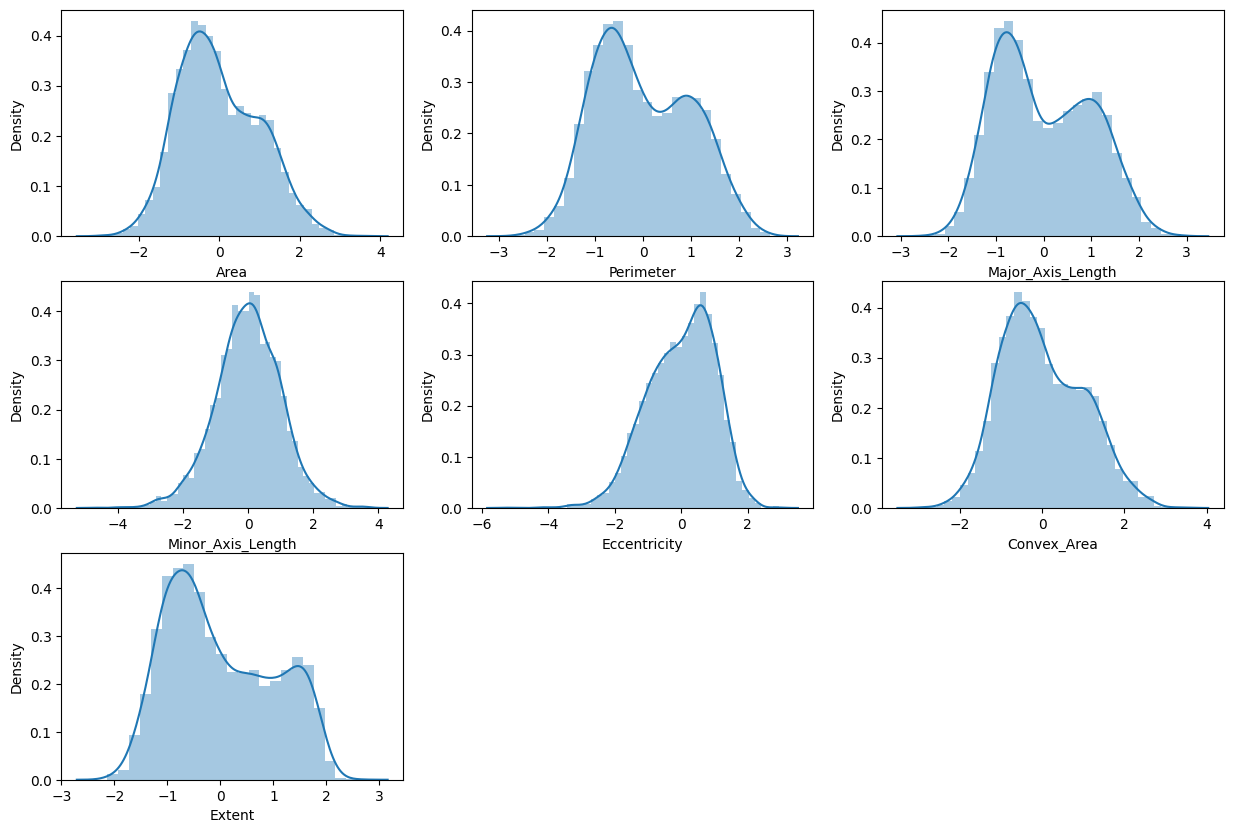

In [44]:
#visualization
plt.figure(figsize = (15,10))
for i in enumerate(columns):
  plt.subplot(3,3,i[0]+1)
  sns.distplot(X1[i[1]])

In [45]:
sns.pairplot(df1,hue='Class')

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

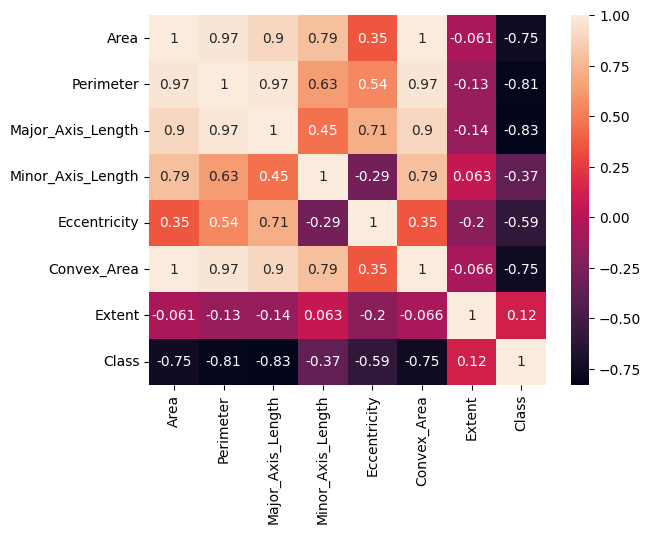

In [46]:
corr= df1.corr()
sns.heatmap(corr,annot=True)


In [47]:
df1

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1.48,2.00,2.35,-0.21,2.02,1.50,-1.15,0
1,1.15,1.13,0.99,0.95,0.41,1.19,-0.60,0
2,1.14,1.32,1.45,0.25,1.21,1.13,0.41,0
3,0.29,0.12,0.26,0.20,0.24,0.23,-0.28,0
4,1.17,1.49,1.32,0.52,0.95,1.30,-0.21,0
...,...,...,...,...,...,...,...,...
3805,-0.71,-1.08,-1.05,-0.10,-1.09,-0.75,0.25,1
3806,-0.60,-0.92,-1.21,0.55,-1.97,-0.59,0.42,1
3807,-0.13,-0.33,-0.30,0.09,-0.28,-0.17,-0.46,1
3808,-1.61,-1.74,-1.58,-1.41,-0.60,-1.61,-0.04,1


In [48]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2,random_state=10)

In [49]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3048, 7), (762, 7), (3048, 1), (762, 1))

In [50]:
pip install lazypredict

In [51]:
from lazypredict.Supervised import LazyClassifier


In [52]:
model = LazyClassifier(verbose=0)

In [53]:

model.fit(x_train,x_test, y_train, y_test)


100%|██████████| 29/29 [00:08<00:00,  3.30it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 CalibratedClassifierCV             0.93               0.93     0.93      0.93   
 LinearSVC                          0.93               0.93     0.93      0.93   
 RidgeClassifier                    0.93               0.93     0.93      0.93   
 RidgeClassifierCV                  0.93               0.92     0.92      0.93   
 LinearDiscriminantAnalysis         0.93               0.92     0.92      0.92   
 LogisticRegression                 0.92               0.92     0.92      0.92   
 PassiveAggressiveClassifier        0.92               0.92     0.92      0.92   
 SVC                                0.92               0.92     0.92      0.92   
 ExtraTreesClassifier               0.92               0.92     0.92      0.92   
 QuadraticDiscriminantAnalysis      0.92               0.92     0.92      0.92   
 RandomForestCla

In [54]:
##deep model

In [55]:
import tensorflow as tf

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [57]:
model1 = Sequential()
model1.add(tf.keras.Input(shape=(7,)))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(4,activation='relu'))
model1.add(Dense(1,activation='softmax'))

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalseNegatives()])

In [58]:
history=model1.fit(x_train,y_train,epochs=10)

Epoch 1/10
96/96 [==============================] - 3s 6ms/step - loss: 0.4237 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 2/10
96/96 [==============================] - 1s 6ms/step - loss: 0.2129 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 0.1861 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 0.1825 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 0.1819 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 6/10
96/96 [==============================] - 0s 5ms/step - loss: 0.1816 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 7/10
96/96 [==============================] - 0s 5ms/step - loss: 0.1807 - binary_accuracy: 0.5771 - false_negatives: 0.0000e+00
Epoch 8/10
96/96 [==============================] - 0s 

In [59]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.5 MB/s eta 0:00:00


In [60]:
import kerastuner as kt

In [72]:
def model_builder(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    model.add(Dense(units=hp.Int('units'+str(i),min_value=4,max_value=256,step=4),
                    activation = hp.Choice('activation'+str(i),values=['sigmoid','relu','tanh','softmax'])))
  model.add(Dense(1,activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalseNegatives()])
  return model

In [75]:
tuner = kt.RandomSearch(model_builder,objective='val_accuracy',max_trials=20,directory='my_dir',project_name='simple_tunner')

In [77]:
tuner.search(x_train,y_train,validation_split=0.2,epochs=100)


Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
4                 |7                 |num_layers
156               |196               |units0
tanh              |tanh              |activation0
148               |4                 |units1
softmax           |sigmoid           |activation1
48                |4                 |units2
relu              |sigmoid           |activation2
120               |4                 |units3
softmax           |sigmoid           |activation3
240               |4                 |units4
softmax           |sigmoid           |activation4
216               |4                 |units5
sigmoid           |sigmoid           |activation5
212               |4                 |units6
relu              |sigmoid           |activation6
196               |None              |units7
sigmoid           |None              |activation7
132               |None              |units8
tanh              |None              |activation8

Epoch 1/100
77/

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 261, in _run_and_update_trial
    tuner_utils.convert_to_metrics_dict(
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner_utils.py", line 225, in convert_to_metrics_dict
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner_utils.py", line 225, in <listcomp>
    [convert_to_metrics_dict(elem, objective) for elem in results]
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner_utils.py", line 238, in convert_to_metrics_dict
    best_value, _ = _get_best_value_and_best_epoch_from_history(
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner

RuntimeError: ignored